In [1]:
import sys
import numpy as np
import exemplos.plot_graph as pg
import matplotlib.pyplot as plt
from exemplos.GFT import GFT
from functools import reduce
import gsp_lib.util as gsp_util

# fig 2 gaussian
import seaborn as sns
import matplotlib.colors as cm
from matplotlib.colors import ListedColormap

from wavelets_designs import app_gsp_filter

import warnings
warnings.filterwarnings('ignore')
import networkx as nx

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

sns.set_style("whitegrid")


In [2]:
 def plot_function_stem(G, posx, fs, lims=None):
    if lims is None:
        lims = [np.min(fs), np.max(fs)]
    markerline, stemlines, baseline = plt.stem(posx, fs, linefmt='k-', markerfmt='bo', basefmt='k-')
    plt.setp(markerline, 'color', '#222222', 'markersize', 1.5) 
    plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1) 
    plt.setp(baseline, 'color', '#333333', 'linewidth', 1) 
    plt.ylim(lims)

def plot_function_color(G, pos, fs, cmap, lims=None):
    if lims is None:
        lims = [np.min(fs), np.max(fs)]
    # cmap = ListedColormap(sns.color_palette('Spectral_r', 255)[0:])
#     cmap = sns.cubehelix_palette(as_cmap=True)
    
    nx.draw_networkx_edges(G, pos=pos,  edge_color="#333333", width=.7)
    nodes = nx.draw_networkx_nodes(G, pos=pos, node_color=fs, node_size=60, 
                                   cmap=cmap, linewidths=.6, vmin=lims[0], vmax=lims[1])
    nodes.set_edgecolor('#999999')
    nodes.set_zorder(8)
    
    return nodes
    # nodes.set_alpha(.8)

def plot_function(G, pos, fs, cmap, lims=None):
    if lims is None:
        lims = [np.min(fs), np.max(fs)]
    margin = .02
    posx = [pos[n][0] for n in G.nodes()]
    plot_function_stem(G, posx, fs, [lims[0]-margin, lims[1]+margin])
    plot_function_color(G, pos, fs, cmap, lims)
#     plt.gca().set_aspect('equal', 'datalim')

#     plt.xticks([])

In [29]:

adj_file =  'exemplos/pert400+_esetnew.adj' #'exemplos/pert400+.adj'
xy_file = 'exemplos/pert400+.xy'

# A = np.loadtxt(adj_file)
pos = np.loadtxt(xy_file)

# G = nx.from_numpy_matrix(A)
G = nx.read_edgelist(adj_file, nodetype=int)

# pos = {a: pos[a,:] for a in range(G.number_of_nodes())}

L, S, U = gsp_util.get_fourier_base(G, 'unnormalized')


In [111]:
# Eset = G_.edges()
# Eset_new = [Eset[ei] for ei in np.random.choice(G_.number_of_edges(), int(G_.number_of_edges()*.75), replace=False)]

# G = nx.from_edgelist(Eset_new)
# L, S, U = gsp_util.get_fourier_base(G, 'unnormalized')


In [36]:
# prop = fm.FontProperties(fname='/Users/pao/Library/Fonts/cmunrm.ttf')
# ax.set_title('This is some random font', fontproperties=prop, size=32)
plt.rc('text', usetex=True)
plt.rc('font',**{'family':'serif','serif':['CMU Serif']}, size=12)

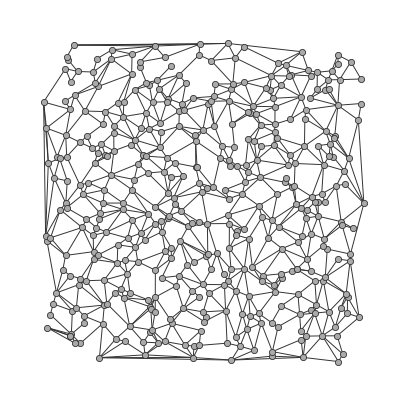

In [32]:
plt.figure(figsize=(5,5))

nx.draw_networkx_edges(G, pos=pos,  edge_color="#333333", width=.7)
nodes = nx.draw_networkx_nodes(G, pos=pos, node_color='#aaaaaa', node_size=20, 
                               linewidths=.6)
nodes.set_edgecolor('#333333')
# plt.ylim([-.11,.15])
# plt.xlim([-1,n_nodes])
plt.xticks([])
plt.yticks([])
plt.axis('equal')
plt.axis('off')
# plt.savefig('gaussian_graph.pdf', bbox_inches='tight')
plt.show()

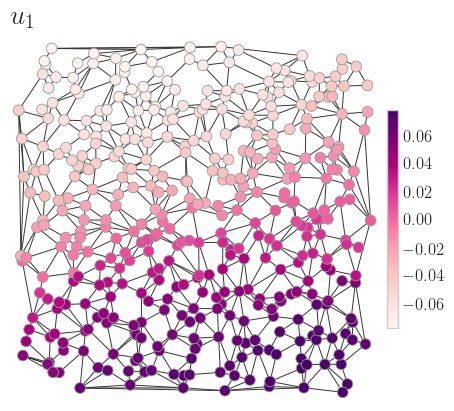

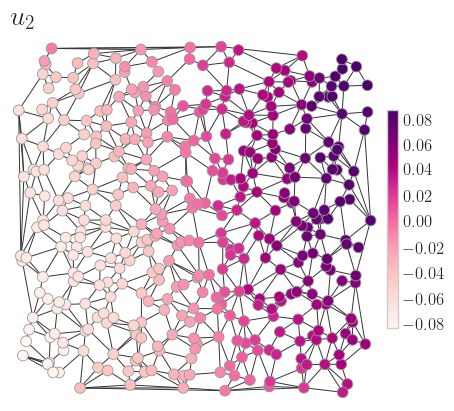

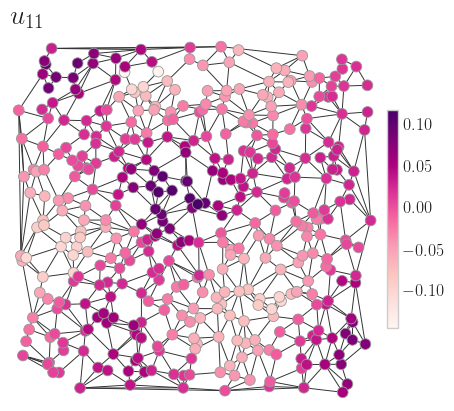

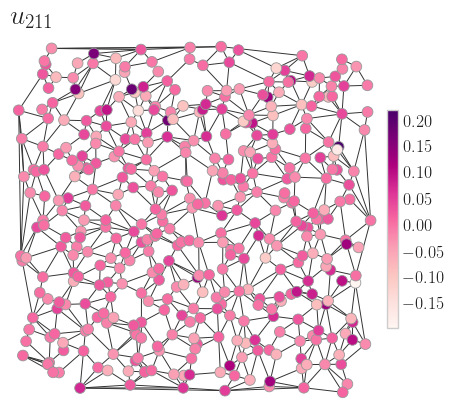

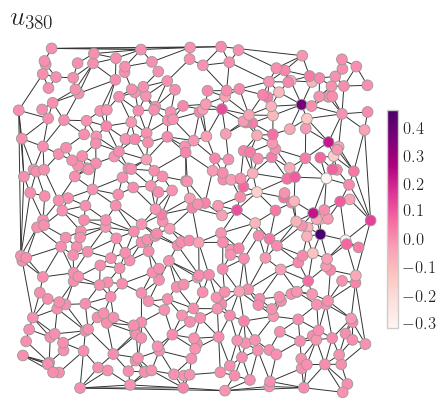

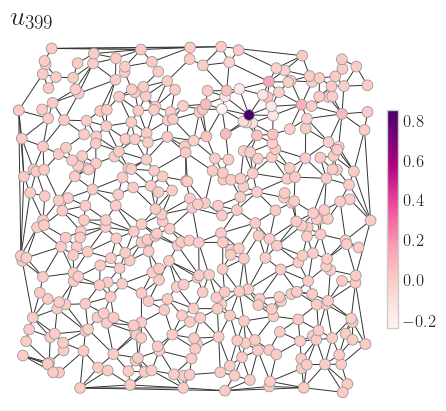

In [378]:
###########
# Graph Function
###########

flims = [np.min(U), np.max(U)]
cmap = ListedColormap(sns.color_palette('RdPu', 255))

l_list = [1, 2, 11, 211, 380, 399]

for l in l_list:
    fs = np.array(U[:,l])
    plt.figure(figsize=(4.8,4))
    nodes = plot_function_color(G, pos, fs, cmap)
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.xlim([-1.5,21])
    plt.ylim([-1.5,20.5])
    # plt.axis('equal')
    plt.tight_layout()
#     sns.despine(left=True, bottom=True)
    plt.title('$u_{{ {} }}$'.format(l), loc='left', fontsize=20)
    cb = plt.colorbar(nodes, orientation="vertical", cmap=cmap, pad=0, shrink=.6)
    plt.savefig('gaussian_u{}.pdf'.format(l), bbox_inches='tight')
    plt.show()

In [ ]:
##### cb_arr = [np.linspace(flims[0], flims[1], 256)]

plt.figure(figsize=(8, .4))

cb_img = plt.imshow(cb_arr, cmap=cmap)
plt.gca().set_visible(False)

cax = plt.axes([0.1, 0.2, 0.8, 0.6])
cb = plt.colorbar(orientation="horizontal", cmap=cmap, cax=cax)

cb.outline.set_edgecolor('#666666')
cb.ax.tick_params(axis='both', colors='#777777')
# plt.savefig('gaussian_cbar.pdf', bbox_inches='tight')
plt.show()



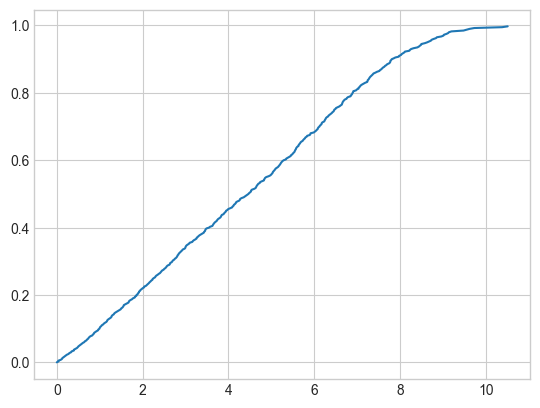

In [33]:
# H, X1 = np.histogram(S, 10, normed=True)
# dx = X1[1] - X1[0]
# F1 = np.cumsum(H)*dx
# plt.plot(X1[1:], F1)

N = G.number_of_nodes()
X2 = np.sort(S)
F2 = np.array(range(N))/float(N)

plt.plot(X2, F2)
plt.show()

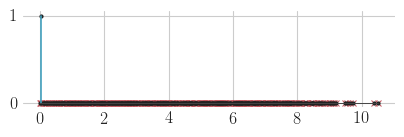

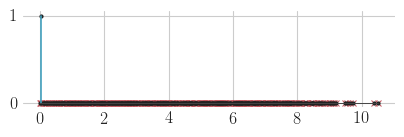

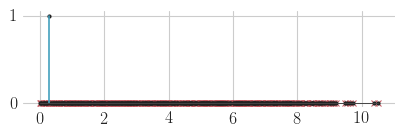

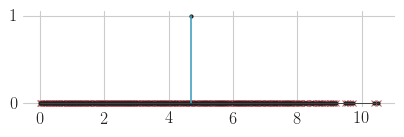

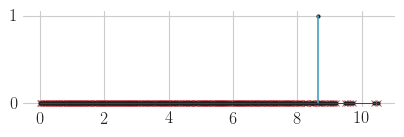

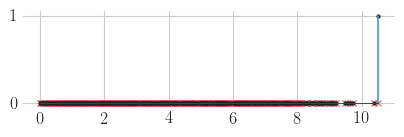

In [402]:
# sns.set_style("white")
for l in l_list:
    fs = np.array(U[:,l])
    fst = np.dot(U.T, fs)
    
    plt.figure(figsize=(4.8,1.25))
    plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
    markerline, stemlines, baseline = plt.stem(S, fst, linefmt='k-', markerfmt='bo', basefmt='k-')
    plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
    plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
    plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
    sns.despine(left=True, bottom=True)

    plt.savefig('gaussian_spectrum_u{}.pdf'.format(l),bbox_inches='tight')
    # plt.axis('off')

    plt.show()

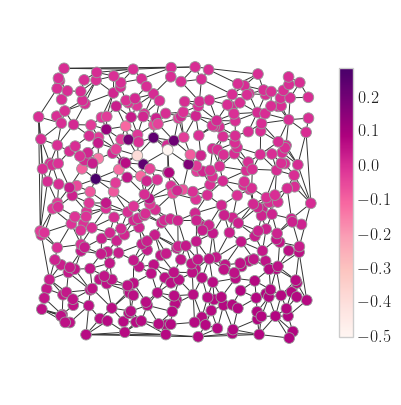

In [409]:
flims = [np.min(U), np.max(U)]
cmap = ListedColormap(sns.color_palette('RdPu', 255))


# prop = fm.FontProperties(fname='/Users/pao/Library/Fonts/cmunrm.ttf')
# ax.set_title('This is some random font', fontproperties=prop, size=32)
# plt.rc('text', usetex=True)
# plt.rc('font',**{'family':'serif','serif':['CMU Serif']}, size=16)

l='4_399'
fs = np.array(U[:,1])
fs[200:] = np.array(U[200:,390])
# fs = np.random.rand(n_nodes)*2-1
plt.figure(figsize=(5,5))
nodes = plot_function_color(G, pos, fs, cmap)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.axis('equal')

cb = plt.colorbar(nodes, orientation="vertical", cmap=cmap, pad=0, shrink=.7)

# plt.title('$u_{{ {} }}$'.format(l), loc='left')
# plt.savefig('gaussian_u{}.pdf'.format(l), bbox_inches='tight')
plt.show()

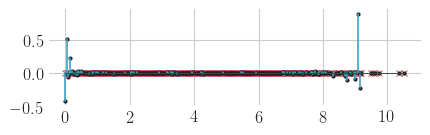

In [410]:
fst = np.dot(U.T, fs)
    
plt.figure(figsize=(4.8,1.25))
plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
markerline, stemlines, baseline = plt.stem(S, fst, linefmt='k-', markerfmt='bo', basefmt='k-')
plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
# plt.savefig('gaussian_spectrum_u{}.pdf'.format(l),bbox_inches='tight')
# plt.axis('off')
sns.despine(left=True, bottom=True)

plt.show()

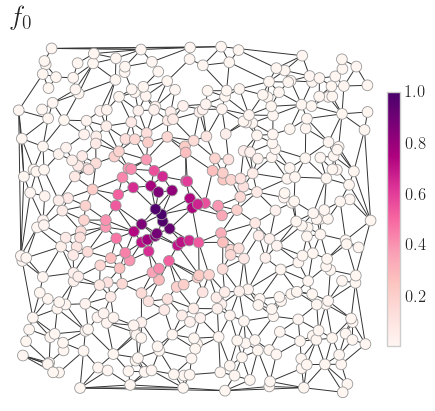

In [37]:
cmap = ListedColormap(sns.color_palette('RdPu', 255))


###########
# Graph Fourier of a Gaussian
###########
n = pos.shape[0]
fs = np.zeros((n,1))
U_ = np.array([[.9,0],[0,.9]])
U_ = np.matrix(np.sqrt(2)*U_)
D_ = np.matrix(np.array([[20,0],[0,20]]))
Di = D_.I
V_ = reduce(np.dot,[U_,Di,U_.transpose()])
pc = 208
for i in range(0,n):
    x = pos[i,:]-pos[pc,:]
    e = reduce(np.dot,[x.transpose(), V_, x])
    fs[i] = np.exp(-e) #+ np.random.normal(0, 0.1, 1)
    
plt.figure(figsize=(4.8,4))
nodes = plot_function_color(G, pos, fs, cmap)
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.xlim([-1.5,21])
plt.ylim([-1.5,20.5])
# plt.axis('equal')
plt.tight_layout()

cb = plt.colorbar(nodes, orientation="vertical", cmap=cmap, pad=0, shrink=.7)

plt.title('$f_0$', loc='left',fontsize=20)
plt.savefig('gaussian_f0.pdf', bbox_inches='tight')
plt.show()

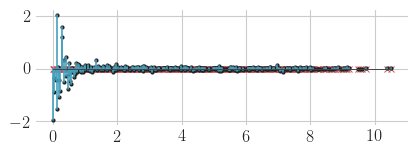

In [404]:
fst = np.dot(U.T, fs)
 
plt.figure(figsize=(4.8,1.5))
plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
markerline, stemlines, baseline = plt.stem(S, fst, linefmt='k-', markerfmt='bo', basefmt='k-')
plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
# plt.axis('off')
sns.despine(left=True, bottom=True)
plt.savefig('gaussian_spectrum_f0.pdf',bbox_inches='tight')
plt.show()

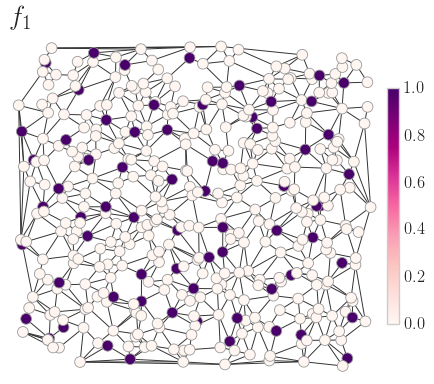

In [523]:
n = pos.shape[0]
fs = np.zeros((n,1))

# range(0, 399, 53)
# [0, 10, 53, 106, 200, 159, 212, 265, 361, 370, 399]:
for pc in range(0, 399, 6):#
    for i in range(0,n):
        x = np.linalg.norm(pos[i,:]-pos[pc,:])
        if x < .08:
            fs[i] = 1

plt.figure(figsize=(4.8,4))
nodes = plot_function_color(G, pos, fs, cmap)
plt.xticks([])
plt.yticks([])
plt.title('$f_1$', loc='left', fontsize=20)
plt.axis('off')
plt.xlim([-1.5,21])
plt.ylim([-1.5,20.5])
# plt.axis('equal')
plt.tight_layout()

cb = plt.colorbar(nodes, orientation="vertical", cmap=cmap, pad=0, shrink=.7)

plt.savefig('gaussian_f1.pdf', bbox_inches='tight')
plt.show()

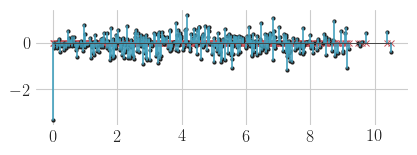

In [524]:
fst = np.dot(U.T, fs)
    
plt.figure(figsize=(4.8,1.5))
plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
markerline, stemlines, baseline = plt.stem(S, fst, linefmt='k-', markerfmt='bo', basefmt='k-')
plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
# plt.axis('off')
sns.despine(left=True, bottom=True)
plt.savefig('gaussian_spectrum_f1.pdf',bbox_inches='tight')

plt.show()

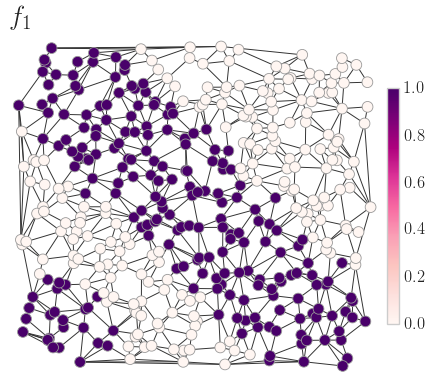

In [446]:
n = pos.shape[0]
fs = np.zeros((n,1))

# range(0, 399, 53)
# [0, 10, 53, 106, 200, 159, 212, 265, 361, 370, 399]:
for pc in range(0, 399, 57):#
    for i in range(0,n):
        x = np.linalg.norm(pos[i,:]-pos[pc,:])
        if x < 4:
            fs[i] = 1


plt.figure(figsize=(4.8,4))
nodes = plot_function_color(G, pos, fs, cmap)
plt.xticks([])
plt.yticks([])
plt.title('$f_1$', loc='left', fontsize=20)
plt.axis('off')
plt.xlim([-1.5,21])
plt.ylim([-1.5,20.5])
# plt.axis('equal')
plt.tight_layout()

cb = plt.colorbar(nodes, orientation="vertical", cmap=cmap, pad=0, shrink=.7)

# plt.savefig('gaussian_f2.pdf', bbox_inches='tight')
plt.show()

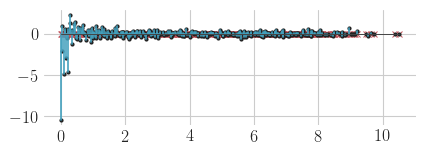

In [447]:
fst = np.dot(U.T, fs)
    
plt.figure(figsize=(4.8,1.5))
plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
markerline, stemlines, baseline = plt.stem(S, fst, linefmt='k-', markerfmt='bo', basefmt='k-')
plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
# plt.axis('off')
sns.despine(left=True, bottom=True)
# plt.savefig('gaussian_spectrum_f2.pdf',bbox_inches='tight')

plt.show()

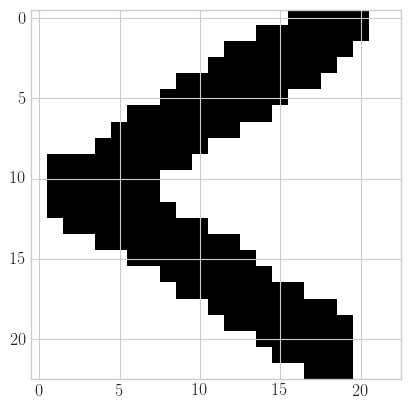

In [531]:
import scipy.ndimage
im = scipy.ndimage.imread('exemplos/vgpg.jpg')
im_arr = np.zeros(im.shape)
im_arr[im<200]=1
plt.imshow(im_arr, cmap=plt.cm.binary)
plt.show()

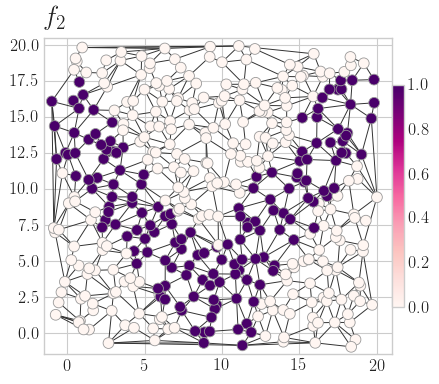

In [534]:
n = pos.shape[0]
fs = np.zeros((n,1))
i = 0
for p in pos:
    fs[i] = im_arr[int(p[0]+2), int(p[1])+2]
    i += 1

plt.figure(figsize=(4.8,4))
nodes = plot_function_color(G, pos, fs, cmap)
# plt.xticks([])
# plt.yticks([])
plt.title('$f_2$', loc='left', fontsize=20)
# plt.axis('off')
plt.xlim([-1.5,21])
plt.ylim([-1.5,20.5])
# plt.axis('equal')
plt.tight_layout()

cb = plt.colorbar(nodes, orientation="vertical", cmap=cmap, pad=0, shrink=.7)

plt.savefig('gaussian_f2.pdf', bbox_inches='tight')
plt.show()

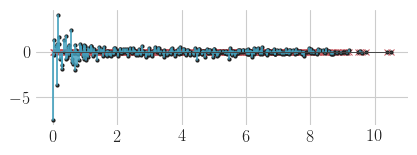

In [535]:
fst = np.dot(U.T, fs)
    
plt.figure(figsize=(4.8,1.5))
plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
markerline, stemlines, baseline = plt.stem(S, fst, linefmt='k-', markerfmt='bo', basefmt='k-')
plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
# plt.axis('off')
sns.despine(left=True, bottom=True)
plt.savefig('gaussian_spectrum_f2.pdf',bbox_inches='tight')

plt.show()

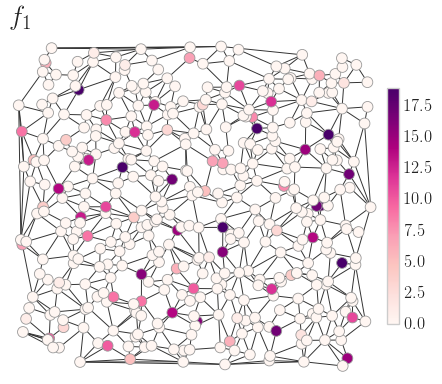

In [529]:
n = pos.shape[0]
fs = np.zeros((n,1))

# range(0, 399, 53)
# [0, 10, 53, 106, 200, 159, 212, 265, 361, 370, 399]:
for pc in range(0, 399, 6):#
    for i in range(0,n):
        x = np.linalg.norm(pos[i,:]-pos[pc,:])
        if x < .08:
            fs[i] = np.random.randint(1, 20)

plt.figure(figsize=(4.8,4))
nodes = plot_function_color(G, pos, fs, cmap)
plt.xticks([])
plt.yticks([])
plt.title('$f_1$', loc='left', fontsize=20)
plt.axis('off')
plt.xlim([-1.5,21])
plt.ylim([-1.5,20.5])
# plt.axis('equal')
plt.tight_layout()

cb = plt.colorbar(nodes, orientation="vertical", cmap=cmap, pad=0, shrink=.7)

# plt.savefig('gaussian_f2.pdf', bbox_inches='tight')
plt.show()


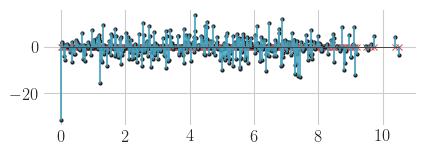

In [530]:
fst = np.dot(U.T, fs)
    
plt.figure(figsize=(4.8,1.5))
plt.plot(S, [0]*fs.size, 'x', color='#C3535A', markersize=4, mew=.7)
markerline, stemlines, baseline = plt.stem(S, fst, linefmt='k-', markerfmt='bo', basefmt='k-')
plt.setp(markerline, 'color', '#222222', 'markersize', 2) 
plt.setp(stemlines, 'color', '#44a1be', 'linewidth',1.2) 
plt.setp(baseline, 'color', '#444444', 'linewidth', .7) 
# plt.axis('off')
sns.despine(left=True, bottom=True)
# plt.savefig('gaussian_spectrum_f2.pdf',bbox_inches='tight')

plt.show()